# Customer Profitability
-----------------------------------------------------------------------------

## ! Important
For this code I divided the data into several csv file. You need to have ALL the csv files to run the code.

In [48]:
import pandas as pd ; import numpy as np ; import itertools ; import matplotlib.pyplot as plt
import string

In [49]:
products = list(string.ascii_uppercase)[0:12]
products.remove('J')
products

col = ['Running Number', 'Customer id']
col += [i for i in products]
#col

### Step 1 : Data and cleaning (be ready it's very long)
- First we take care of the direct cost file
- Second Sale ledge
- Third Indirect cost

<u> File 1 : Direct cost </u>

In [50]:
direct_cost = pd.read_csv('Direct cost sheet.csv', delimiter=';', encoding= 'unicode_escape')
direct_cost.dropna(axis = 0, how = 'all', inplace = True)
direct_cost.dropna(axis = 1, how = 'all', inplace = True)
direct_cost.drop(direct_cost.head(5).index,inplace=True)

# Create a dataframe for the components used in direct cost
direct_driver_used = direct_cost.iloc[:,:len(products)+2].copy()
direct_driver_used.columns = col
direct_driver_used = direct_driver_used.apply(lambda x: x.astype(np.int))
direct_driver_used.reset_index(inplace= True, drop = True)
direct_driver_used

,Running Number,Customer id,A,B,C,D,E,F,G,H,I,K,L
0,1,105,21,44,0,0,51,0,130,0,23,0,3
1,2,117,0,0,0,10,27,0,0,17,0,20,9
2,3,72,2,0,0,17,53,0,0,0,18,0,0
3,4,65,24,69,97,0,67,90,0,19,0,75,30
4,5,50,12,70,73,1,49,0,0,0,27,106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,52,5,0,0,20,0,33,15,0,0,44,0
2996,2997,121,21,5,0,12,38,0,14,0,0,71,0
2997,2998,138,6,0,26,6,0,135,38,0,0,0,42
2998,2999,149,17,0,45,0,24,71,0,28,10,0,18


In [51]:
#Dataframe for direct cost per component per order
direct_cost_order_v1 = direct_cost.iloc[:,len(products)+2:len(products)*2+2]
direct_cost_order_v1.reset_index(drop = True, inplace = True)
info = pd.DataFrame(direct_driver_used[['Running Number', 'Customer id']])
direct_cost_order = info.join(direct_cost_order_v1)
direct_cost_order.columns = col

# # Clean the data by removing the euro, comma and - signs
direct_cost_order= direct_cost_order.replace('\x80','',regex=True)
direct_cost_order= direct_cost_order.replace(',','.',regex=True)
direct_cost_order= direct_cost_order.replace('-',0,regex=True)

# # Convert all product columns to floats
direct_cost_order[products] = direct_cost_order[products].apply(pd.to_numeric)
direct_cost_order[direct_cost_order.select_dtypes(include = object).columns] = direct_cost_order.select_dtypes(include = object).apply(lambda x: x.astype(np.int))
direct_cost_order

,Running Number,Customer id,A,B,C,D,E,F,G,H,I,K,L
0,1,105,7.58,4.46,0.00,0.00,9.54,0.00,6.97,0.00,8.13,0.00,7.23
1,2,117,0.00,0.00,0.00,3.80,12.73,0.00,0.00,10.85,0.00,7.52,19.31
2,3,72,7.10,0.00,0.00,10.11,7.17,0.00,0.00,0.00,7.02,0.00,0.00
3,4,65,8.96,2.86,12.49,0.00,6.75,53.71,0.00,8.61,0.00,11.52,16.26
4,5,50,5.36,5.02,18.67,4.34,12.44,0.00,0.00,0.00,11.07,6.54,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,52,8.96,0.00,0.00,5.52,0.00,72.25,9.28,0.00,0.00,6.96,0.00
2996,2997,121,14.94,4.84,0.00,8.76,10.54,0.00,13.21,0.00,0.00,5.47,0.00
2997,2998,138,11.92,0.00,25.44,7.65,0.00,60.07,10.00,0.00,0.00,0.00,7.07
2998,2999,149,6.32,0.00,11.59,0.00,8.30,82.23,0.00,14.79,5.44,0.00,5.08


<u> File 2: Sales ledger </u>

In [52]:
sales_ledger = pd.read_csv('Sales ledger.csv', delimiter=';', encoding= 'unicode_escape')
sales_ledger.dropna(axis = 0, how = 'all', inplace = True)
sales_ledger.dropna(axis = 1, how = 'all', inplace = True)
sales_ledger.drop(sales_ledger.tail(1).index,inplace=True)
sales_ledger.drop(sales_ledger.head(2).index,inplace=True)
sales_ledger.reset_index(drop=True, inplace = True)
sales_ledger

,Unnamed: 0,Unnamed: 1,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,1,105,17,0,63,0,28,0,95,0,..., -," 49,00", -," 16,00", -," 6,00", -, -," 17,00"," 18,00"
1,2,117,16,0,0,17,0,89,0,11,..., -, -," 5,00", -," 103,00", -," 18,00"," 15,00", -, -
2,3,72,30,31,0,0,25,63,74,55,...," 9,00", -, -," 15,00"," 167,00"," 14,00"," 15,00"," 16,00", -," 20,00"
3,4,65,4,0,24,0,44,92,0,58,..., -," 49,00", -," 19,00"," 101,00", -," 17,00", -, -, -
4,5,50,18,0,0,2,0,0,43,0,..., -, -," 17,00", -, -," 30,00", -," 19,00"," 16,00", -
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,52,4,9,0,0,0,43,0,0,...," 7,00", -, -, -," 139,00", -, -," 20,00"," 16,00", -
2996,2997,121,20,28,72,0,0,0,28,0,...," 8,00"," 20,00", -, -, -," 36,00", -, -," 18,00", -
2997,2998,138,0,41,0,0,10,0,82,0,...," 10,00", -, -," 15,00", -," 22,00", -, -," 19,00", -
2998,2999,149,11,30,38,0,0,0,11,21,...," 6,00"," 33,00", -, -, -," 20,00"," 16,00"," 15,00", -," 18,00"


In [53]:
# Create a dataframe for the units sold
sale_product = sales_ledger.iloc[:,:len(products)+2].copy()
sale_product.columns = col
sale_product = sale_product.apply(lambda x: x.astype(np.int))
sale_product.reset_index(drop=True, inplace = True)
sale_product

,Running Number,Customer id,A,B,C,D,E,F,G,H,I,K,L
0,1,105,17,0,63,0,28,0,95,0,0,90,34
1,2,117,16,0,0,17,0,89,0,11,3,0,0
2,3,72,30,31,0,0,25,63,74,55,16,0,35
3,4,65,4,0,24,0,44,92,0,58,0,0,0
4,5,50,18,0,0,2,0,0,43,0,17,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,52,4,9,0,0,0,43,0,0,13,101,0
2996,2997,121,20,28,72,0,0,0,28,0,0,36,0
2997,2998,138,0,41,0,0,10,0,82,0,0,13,0
2998,2999,149,11,30,38,0,0,0,11,21,8,0,30


In [54]:
#Dataframe for direct cost per component per order
sale_price_unit_v1 = sales_ledger.iloc[:,len(products)+3:].copy()
info = pd.DataFrame(sale_product[['Running Number', 'Customer id']])
sale_price_unit = info.join(sale_price_unit_v1)
sale_price_unit.columns = col

# Clean the data by removing the euro, comma and - signs
sale_price_unit= sale_price_unit.replace('\x80','',regex=True)
sale_price_unit= sale_price_unit.replace(',','.',regex=True)
sale_price_unit= sale_price_unit.replace('-',0,regex=True)

# Convert all product columns to floats
sale_price_unit[products] = sale_price_unit[products].apply(pd.to_numeric)
sale_price_unit[sale_price_unit.select_dtypes(include = object).columns] = sale_price_unit.select_dtypes(include = object).apply(lambda x: x.astype(np.int))
sale_price_unit.reset_index(drop=True, inplace = True)
sale_price_unit


,Running Number,Customer id,A,B,C,D,E,F,G,H,I,K,L
0,1,105,16.0,0.0,49.0,0.0,16.0,0.0,6.0,0.0,0.0,17.0,18.0
1,2,117,19.0,0.0,0.0,5.0,0.0,103.0,0.0,18.0,15.0,0.0,0.0
2,3,72,18.0,9.0,0.0,0.0,15.0,167.0,14.0,15.0,16.0,0.0,20.0
3,4,65,18.0,0.0,49.0,0.0,19.0,101.0,0.0,17.0,0.0,0.0,0.0
4,5,50,19.0,0.0,0.0,17.0,0.0,0.0,30.0,0.0,19.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,52,18.0,7.0,0.0,0.0,0.0,139.0,0.0,0.0,20.0,16.0,0.0
2996,2997,121,15.0,8.0,20.0,0.0,0.0,0.0,36.0,0.0,0.0,18.0,0.0
2997,2998,138,0.0,10.0,0.0,0.0,15.0,0.0,22.0,0.0,0.0,19.0,0.0
2998,2999,149,18.0,6.0,33.0,0.0,0.0,0.0,20.0,16.0,15.0,0.0,18.0


<u> File 3 :Indirect cost </u>

In [55]:
indirect_costs= pd.read_csv('Indirect cost.csv', delimiter=';', encoding= 'unicode_escape')
indirect_costs.dropna(axis = 0, how = 'all', inplace = True)
indirect_costs.dropna(axis = 1, how = 'all', inplace = True)
# indirect_costs.drop(indirect_costs.tail(1).index,inplace=True)
# indirect_costs.drop(indirect_costs.head(2).index,inplace=True)
indirect_costs.reset_index(drop=True, inplace = True)
indirect_costs


,Unnamed: 0,Activity cost,Cost driver,Explanation,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Sales,750000.0,Number order lines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Order incoming from customers,650000.0,Number order lines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Number components per pallet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Warehouse,467000.0,Number pallets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Production/Assembly,1700000.0,Number components,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Quality control,450000.0,Number components,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Warehouse out,340000.0,Number sold units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Customer support,250000.0,Number products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,Each component comes on a pallet.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,One pallet contains the following amount of co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This file is in 2 parts the first 11 lines are the description of the activities, their activity cost and their cost driver. <br>
The secon part is the detail of how many pallets are used per products. <br>
I will create 2 dataframes, one for the activities costs and the other of the warehouse drivers. 

In [56]:
cost_info = indirect_costs.iloc[:8,:3].copy()
cost_info = cost_info.rename({'Unnamed: 0':'Activity'}, axis=1)
cost_info.dropna(axis = 0, how = 'any', inplace = True)
cost_info.reset_index(drop=True, inplace = True)
cost_info.at[1, 'Activity'] = 'Order'
cost_info

,Activity,Activity cost,Cost driver
0,Sales,750000.0,Number order lines
1,Order,650000.0,Number order lines
2,Warehouse,467000.0,Number pallets
3,Production/Assembly,1700000.0,Number components
4,Quality control,450000.0,Number components
5,Warehouse out,340000.0,Number sold units
6,Customer support,250000.0,Number products


In [57]:
components_pallet = indirect_costs.iloc[-1,3:].copy()
components_pallet = pd.DataFrame(components_pallet).T
components_pallet.columns = products
components_pallet.reset_index(drop=True, inplace = True)
components_pallet = components_pallet.apply(pd.to_numeric)
components_pallet

,A,B,C,D,E,F,G,H,I,K,L
0,405,339,102,498,236,475,371,398,138,385,322


### Step 2: Compute Revenues

In [58]:
# sale_product sale_price_unit 
revenues = sale_product.iloc[:,2:].mul(sale_price_unit.iloc[:,2:]).copy()
revenues['Customer id'] = sale_product['Customer id']
column_to_move = revenues.pop('Customer id') #Just move the activity column at the front
revenues.insert(0, 'Customer id', column_to_move)
revenues

,Customer id,A,B,C,D,E,F,G,H,I,K,L
0,105,272.0,0.0,3087.0,0.0,448.0,0.0,570.0,0.0,0.0,1530.0,612.0
1,117,304.0,0.0,0.0,85.0,0.0,9167.0,0.0,198.0,45.0,0.0,0.0
2,72,540.0,279.0,0.0,0.0,375.0,10521.0,1036.0,825.0,256.0,0.0,700.0
3,65,72.0,0.0,1176.0,0.0,836.0,9292.0,0.0,986.0,0.0,0.0,0.0
4,50,342.0,0.0,0.0,34.0,0.0,0.0,1290.0,0.0,323.0,1056.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,52,72.0,63.0,0.0,0.0,0.0,5977.0,0.0,0.0,260.0,1616.0,0.0
2996,121,300.0,224.0,1440.0,0.0,0.0,0.0,1008.0,0.0,0.0,648.0,0.0
2997,138,0.0,410.0,0.0,0.0,150.0,0.0,1804.0,0.0,0.0,247.0,0.0
2998,149,198.0,180.0,1254.0,0.0,0.0,0.0,220.0,336.0,120.0,0.0,540.0


In [59]:
revenues_customer = revenues.iloc[:,1:].sum(axis=1).to_frame()
revenues_customer['Customer id'] = revenues['Customer id']
revenues_customer.columns = ['Revenues per customers', 'Customer id']
revenues_customer = revenues_customer.groupby(['Customer id']).sum()
revenues_customer

,Revenues per customers
Customer id,
1,113509.0
2,190275.0
3,133392.0
4,130553.0
5,146938.0
...,...
146,145753.0
147,132888.0
148,115690.0


In [60]:
revenues_product = revenues.iloc[:,1:].sum(axis=0).to_frame()
revenues_product.columns = ['Revenues per product']
revenues_product

,Revenues per product
A,790128.0
B,272276.0
C,2447929.0
D,192933.0
E,680602.0
F,10649038.0
G,1605232.0
H,790669.0
I,398438.0
K,1462244.0


### Step 3: Compute direct costs

In [61]:
# direct_cost_order direct_driver_used
direct_costs = direct_cost_order.iloc[:,2:].mul(direct_driver_used.iloc[:,2:]).copy()
direct_costs['Customer id'] = direct_cost_order['Customer id']
column_to_move = direct_costs.pop('Customer id') #Just move the activity column at the front
direct_costs.insert(0, 'Customer id', column_to_move)
direct_costs

,Customer id,A,B,C,D,E,F,G,H,I,K,L
0,105,159.18,196.24,0.00,0.00,486.54,0.00,906.10,0.00,186.99,0.00,21.69
1,117,0.00,0.00,0.00,38.00,343.71,0.00,0.00,184.45,0.00,150.40,173.79
2,72,14.20,0.00,0.00,171.87,380.01,0.00,0.00,0.00,126.36,0.00,0.00
3,65,215.04,197.34,1211.53,0.00,452.25,4833.90,0.00,163.59,0.00,864.00,487.80
4,50,64.32,351.40,1362.91,4.34,609.56,0.00,0.00,0.00,298.89,693.24,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,52,44.80,0.00,0.00,110.40,0.00,2384.25,139.20,0.00,0.00,306.24,0.00
2996,121,313.74,24.20,0.00,105.12,400.52,0.00,184.94,0.00,0.00,388.37,0.00
2997,138,71.52,0.00,661.44,45.90,0.00,8109.45,380.00,0.00,0.00,0.00,296.94
2998,149,107.44,0.00,521.55,0.00,199.20,5838.33,0.00,414.12,54.40,0.00,91.44


In [62]:
direct_costs_customer = direct_costs.iloc[:,1:].sum(axis=1).to_frame()
direct_costs_customer['Customer id'] = direct_costs['Customer id']
direct_costs_customer.columns = ['Direct costs per customers', 'Customer id']
direct_costs_customer = direct_costs_customer.groupby(['Customer id']).sum()
direct_costs_customer

,Direct costs per customers
Customer id,
1,129343.40
2,106001.86
3,124400.27
4,87212.67
5,99841.38
...,...
146,88427.44
147,119884.80
148,80815.67


In [63]:
direct_costs_product = direct_costs.iloc[:,1:].sum(axis=0).to_frame()
direct_costs_product.columns = ['Direct Costs per products']
direct_costs_product

,Direct Costs per products
A,547393.85
B,200253.44
C,1646868.75
D,130159.34
E,472498.20
F,7852102.94
G,1185239.35
H,535411.20
I,263661.36
K,972417.66


### Step 4: Indirect costs

In [64]:
cost_info

,Activity,Activity cost,Cost driver
0,Sales,750000.0,Number order lines
1,Order,650000.0,Number order lines
2,Warehouse,467000.0,Number pallets
3,Production/Assembly,1700000.0,Number components
4,Quality control,450000.0,Number components
5,Warehouse out,340000.0,Number sold units
6,Customer support,250000.0,Number products


I'm going to compute the total number of drivers used for each activity

In [65]:
#Number of order lines ie number of order made
nb_order_lines = sale_product[sale_product.columns[0]].count()

#Number Pallets 
nb_products_per_line = sale_product.iloc[:,2:].sum(axis=0).tolist()
nb_pallets_per_line = [] 
for i in range(len(nb_products_per_line)) :
    nb_pallets_per_line.append(nb_products_per_line[i] / components_pallet.iloc[:,i].values)
nb_pallets_per_line = np.reshape(nb_pallets_per_line,(1,len(nb_products_per_line))).ravel().tolist()
nb_pallets = np.sum(nb_pallets_per_line).astype(int)

# Number Components 
nb_components = direct_driver_used.iloc[:,2:].to_numpy().sum()

# Number Components 
nb_sold_units = sale_product.iloc[:,2:].to_numpy().sum()

total_drivers = [nb_order_lines, nb_order_lines, nb_pallets, 
nb_components, nb_components, nb_sold_units, nb_sold_units]
#print(nb_order_lines, nb_sold_units, nb_pallets, nb_components)

# Append the cost info dataframe with the number of units drivers and the cost per unit
cost_info['Cost Driver Units'] = total_drivers
cost_info['Unit Cost'] = np.round(cost_info['Activity cost'] / cost_info['Cost Driver Units'],2)
cost_info

,Activity,Activity cost,Cost driver,Cost Driver Units,Unit Cost
0,Sales,750000.0,Number order lines,3000,250.00
1,Order,650000.0,Number order lines,3000,216.67
2,Warehouse,467000.0,Number pallets,2099,222.49
3,Production/Assembly,1700000.0,Number components,693265,2.45
4,Quality control,450000.0,Number components,693265,0.65
5,Warehouse out,340000.0,Number sold units,542081,0.63
6,Customer support,250000.0,Number products,542081,0.46


In [66]:
nb_pallets_per_product = []
for i in range(len(nb_pallets_per_line)): 
    nb_pallets_per_product.append(nb_pallets_per_line[i] / nb_products_per_line[i])
ic_warehouse = nb_pallets_per_product* cost_info.loc[cost_info['Cost driver'].str.contains(r'pallets'), 'Unit Cost'].values
ic_warehouse

array([0.54935802, 0.65631268, 2.18127451, 0.44676707, 0.94275424,
       0.4684    , 0.5997035 , 0.5590201 , 1.61224638, 0.5778961 ,
       0.69096273])

In [67]:
products_indirect_costs = pd.DataFrame(columns = cost_info['Activity'].values.tolist())
products_indirect_costs['Sales'] = np.repeat(cost_info.at[0, 'Unit Cost'], len(sale_product))
products_indirect_costs['Order'] = np.repeat(cost_info.at[1, 'Unit Cost'], len(sale_product))
products_indirect_costs['Warehouse'] = np.round((sale_product.iloc[:,2:] * ic_warehouse).sum(axis=1),2)
products_indirect_costs['Production/Assembly'] = np.round((direct_driver_used.iloc[:,2:]).sum(axis=1) * cost_info.at[3, 'Unit Cost'],2)
products_indirect_costs['Quality control'] = np.round((direct_driver_used.iloc[:,2:]).sum(axis=1) * cost_info.at[4, 'Unit Cost'],2)
products_indirect_costs['Warehouse out'] = np.round((sale_product.iloc[:,2:]).sum(axis=1) * cost_info.at[5, 'Unit Cost'],2)
products_indirect_costs['Customer support'] = np.round((sale_product.iloc[:,2:]).sum(axis=1) * cost_info.at[6, 'Unit Cost'],2)

products_indirect_costs['Total indirect cost'] = products_indirect_costs.sum(axis =1)

products_indirect_costs['Customer id'] = sale_product['Customer id']
column_to_move = products_indirect_costs.pop('Customer id') #Just move the activity column at the front
products_indirect_costs.insert(0, 'Customer id', column_to_move)

products_indirect_costs

,Customer id,Sales,Order,Warehouse,Production/Assembly,Quality control,Warehouse out,Customer support,Total indirect cost
0,105,250.0,216.67,305.63,666.40,176.80,206.01,150.42,1971.93
1,117,250.0,216.67,69.06,203.35,53.95,85.68,62.56,941.27
2,72,250.0,216.67,215.01,220.50,58.50,207.27,151.34,1319.29
3,65,250.0,216.67,171.55,1153.95,306.15,139.86,102.12,2340.30
4,50,250.0,216.67,102.12,828.10,219.70,91.98,67.16,1775.73
...,...,...,...,...,...,...,...,...,...
2995,52,250.0,216.67,107.57,286.65,76.05,107.10,78.20,1122.24
2996,121,250.0,216.67,224.01,394.45,104.65,115.92,84.64,1390.34
2997,138,250.0,216.67,93.02,619.85,164.45,91.98,67.16,1503.13
2998,149,250.0,216.67,160.58,521.85,138.45,93.87,68.54,1449.96


In [68]:
indirect_cost_customer = products_indirect_costs.groupby(['Customer id'])['Total indirect cost'].sum().copy()
indirect_cost_customer = pd.DataFrame(indirect_cost_customer)
indirect_cost_customer

,Total indirect cost
Customer id,
1,30406.69
2,35664.02
3,35182.96
4,33263.96
5,30052.20
...,...
146,31996.11
147,32823.94
148,27730.78


### Step 5. Profit 

In [77]:
customers = [revenues_customer, direct_costs_customer, indirect_cost_customer]

profits_customer = pd.DataFrame().join(customers, how="outer")
profits_customer.columns = ['Revenue per customer', 'Direct cost per customer', 'Indirect cost per customer']
profits_customer['Profit per customers'] = np.round(profits_customer['Revenue per customer'] - 
profits_customer['Direct cost per customer'] - profits_customer['Indirect cost per customer'],2)

profits_customer

,Revenue per customer,Direct cost per customer,Indirect cost per customer,Profit per customers
Customer id,,,,
1,113509.0,129343.40,30406.69,-46241.09
2,190275.0,106001.86,35664.02,48609.12
3,133392.0,124400.27,35182.96,-26191.23
4,130553.0,87212.67,33263.96,10076.37
5,146938.0,99841.38,30052.20,17044.42
...,...,...,...,...
146,145753.0,88427.44,31996.11,25329.45
147,132888.0,119884.80,32823.94,-19820.74
148,115690.0,80815.67,27730.78,7143.55


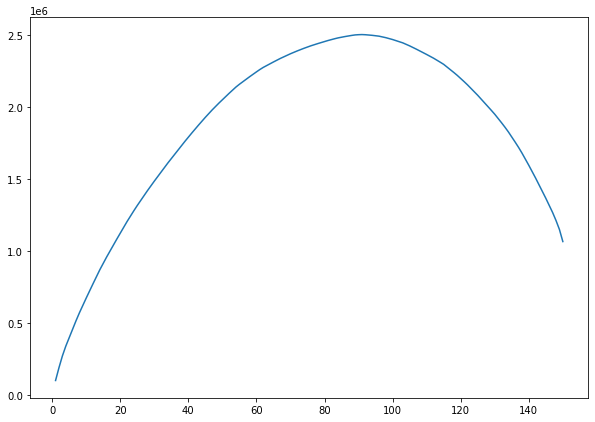

In [81]:
sorted_profit= profits_customer.sort_values(by=['Profit per customers'], ascending=False)
cid = sorted_profit.index.values.tolist() ; x = profits_customer.index.values.tolist()
y = sorted_profit['Profit per customers'].values.tolist()

plt.figure(figsize=(10,7))
plt.plot(x,np.cumsum(y), label = 'Cummulative Profit')
#plt.scatter(x,np.cumsum(y))
# for i in range(len(x)):
#     plt.text(x[i], np.cumsum(y)[i], cid[i])
# plt.legend() ; plt.show()